In [1]:
f = x -> x^2 - 4*x + 3.5
using Polynomials
@show r = roots(Poly([3.5,-4,1]));

r = roots(Poly([3.5, -4, 1])) = [2.70711, 1.29289]


Here is the fixed point iteration. This time we keep track of the whole sequence of approximations. 

In [2]:
g = x -> x - f(x);
x = 2.1; 
for k = 1:12
    x = [x;g(x[k])]
end
x

13-element Array{Float64,1}:
 2.1               
 2.5900000000000003
 2.7419            
 2.69148439        
 2.713333728386328 
 2.704488720332788 
 2.708184363256659 
 2.7066592708954196
 2.707291945752974 
 2.707030049225946 
 2.7071385587175025
 2.707093617492436 
 2.707112233593897 

It's easiest to construct and plot the sequence of errors. 

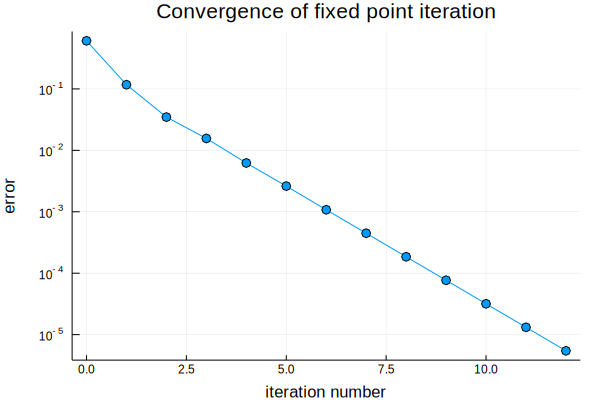

In [3]:
using Plots
err = @. abs(x-r[1])
plot(0:12,err,m=:o,
    leg=:none,xaxis=("iteration number"),yaxis=("error",:log10),title="Convergence of fixed point iteration")

It's quite clear that the convergence quickly settles into a linear rate. We could estimate this rate by doing a least-squares fit to a straight line. Keep in mind that the values for small $k$ should be left out of the computation, as they don't represent the linear trend.  

In [4]:
p = polyfit(5:12,log.(err[5:12]),1)

Poly(-0.6680573888362207 - 0.8807181589724035*x)

We can exponentiate the slope to get the convergence constant $\sigma$.

In [5]:
sigma = exp(p.a[2])

0.41448513854897917

The numerical values of the error should decrease by a factor of $\sigma$ at each iteration. We can check this easily with an elementwise division.

In [6]:
@. err[9:12] / err[8:11]

4-element Array{Float64,1}:
 0.41376605208270323
 0.4143987269397045 
 0.4141368304158358 
 0.41424533989920437

The methods for finding $\sigma$ agree well.